Covariance
Correlation
Hypothesis tessting
T-test
F-test
Confidence intervals
p-values
Type I/II errors
Test Power


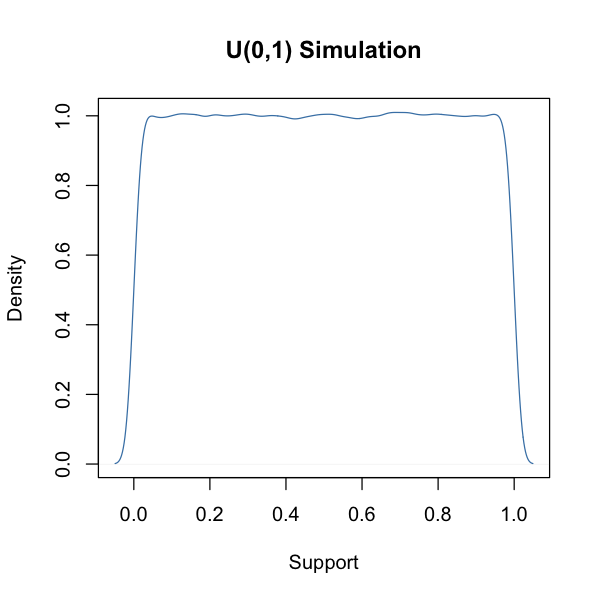

In [1]:
options(repr.plot.width=5, repr.plot.height=5)
a<-density(runif(1000000))
plot(a,main='U(0,1) Simulation',xlab='Support',ylab='Density',col='steelblue')

This is definitely our least intuitive simulation so far, but when we consider the analogy with the Discrete Uniform distribution (and our dice simulation) it is much easier to make sense of. The first thing to note is the new terms **density** and **support**. In the Discrete uniform simulation we ran we displayed the frequency of each observation on the y-axis, which is simply the number of times each side of our 'die' came up, and the observations on the x-axis. Density and support are in a sense the continuous form of of these. 

Density is an estimation of a probability distribution, like our pmf from before. Using methods which we won't delve into here R creates its best guess of what probability distribution these data were drawn from. The important difference is that because the Continuous Uniform distribution is (obviously) a continuous distribution we must use a **probability *density* function** (pdf), not a pmf. The same rules still apply to our pdfs as our pmf though, and the most obvious way to see this is by the fact that all valid probability functions must have total probabilities of exactly 1, so by intregating our 1 by 1 sort-of-square above we know this rule still applies.

The support of our distribution is the range of values possible. This is useful because instead about thinking about any one point, we think about a range of points or a length of the support. 

We said before that the pmf of a Discrete Uniform distribution is:

$ P(X) =
  \begin{cases}
    1/n       &   \forall X \in S \text{ where |S|=n}\\
    0 & \text{o/w}
  \end{cases}
$

In the case of the Continuous Uniform distribution $U(a,b)$, where our support is [a,b], we have the pdf (which uses f(x)/x notation in place of P(X)/X notation to represent the continuous/discrete difference:

$ f(x) =
  \begin{cases}
    \frac{1}{b-a}       &   \text{for } x \in [a,b] \\
    0 & \text{o/w}
  \end{cases}
$

Unforunately this is not a 'point-and-shoot' probability function anymore, because we can't think about specific values in continuous distributions. Instead we need to think about the area within parts of a pdf, using integrals, and use that as a means of finding the probability of an event occuring. 

To make this more concrete lets go back to our picking a random number example. We've already established the probability of picking any specific probability, say 0.5, is exactly 0. But what if we wanted to find the chance we pick a number between, say, 0.4 and 0.6, or $P(0.4≤X≤0.6)$? 

In the Discrete Uniform case, say the dice example, we would solve this kind of problem (say $P(4≤X≤6)$) with sigma notation and simple addition.

 $P(4≤X≤6)=\sum\limits_{4}^{6}\frac{1}{6}=P(X=4)+P(X=5)+P(X=6)=\frac{1}{6}+\frac{1}{6}+\frac{1}{6}=0.5$
 
 By analogy we solve the continuous case when $X$~$U(0,1)$:
 
 $ P(0.4≤X≤0.6)=\int\limits_{0.4}^{0.6} \frac{1}{1-0}  \mathrm{d} x=0.6-0.4=0.2$
 
 Stated in plain English, this means there is a 20% change of choosing a number between 0.4 and 0.6, which in a way does make sense. If we drew a line between 0 and 1, the section of it which is between 0.4 and 0.6 is 20% of the line. This means the support [0.4,0.6] is 20% of the support [0,1], so we should expect to choose values in it 20% of the time. ***AND THAT'S WHAT THE SIMULATION SAID!*** Because our distribution was $U(0,1)$ we didn't need to 'scale' the size of our interval by any number - the [0.4,0.6] interval just takes up 0.6-0.4 (20%) of the total [0,1] support. So for any value in the [0,1] range the density is 1. If the support had been [0,10] then the interval [0.4,0.6] would have only been 2%, and a support of [0,100] would have been 0.2%. So in these cases the densities would have been 0.1 and 0.01 to 'scale' our interval accoridngly (because [0,1] is 0.1 and 0.01 the size of [0,10] and [0,100] repsectively*). Likewise if we'd chosen the support [0.3,0.7] then the interval would have been 50% of the support. So we'd need a density of... 2.5 (because [0,1] is 2.5 times the size of [0.4,0.6])! Let's see a quick simulation to make sure we've got that right.



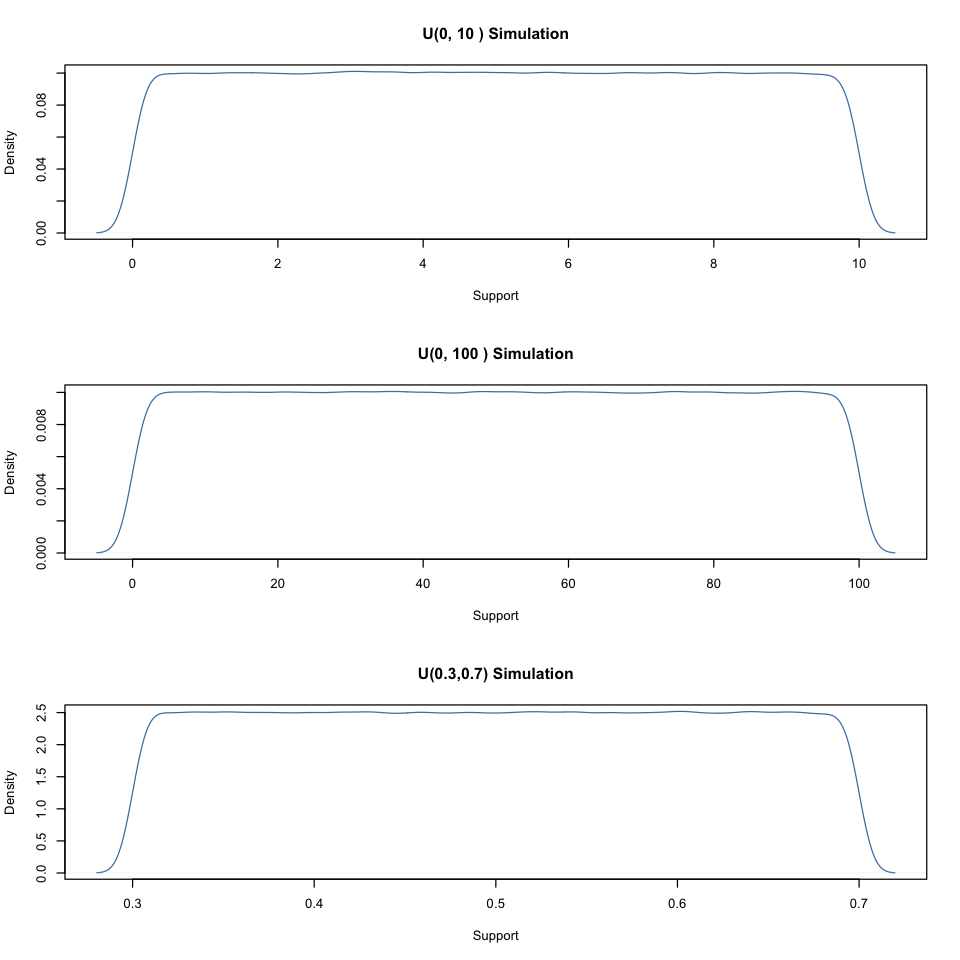

In [2]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(3,1))
for (i in 1:2) {a<-density(runif(1000000,0,10^i))
plot(a,main=paste('U(0,',10^i,') Simulation'),xlab='Support',ylab='Density',col='steelblue')}
plot(density(runif(1000000,0.3,0.7)),main='U(0.3,0.7) Simulation',xlab='Support',ylab='Density',col='steelblue')

The last thing for us to cover before moving on is the expected value of a $U(a,b)$ distributed random variable X, or $E(X)$. In the discrete case we calculated expected value using $E(X)=\sum\limits_{i=1}^{n}p_ix_i$, but as mentioned $p_i=0$ for every i in our distribution and there are infinite i's! This points us in a calculus direction. For continuous random variables we calculate expected value using $E(X)=\int\limits_{-\infty}^{\infty} xf(x)  \mathrm{d}x$, where $f(x)$ is the pdf of X. 

We already know the pdf of the $U(a,b)$ distribution is $ f(x) =
  \begin{cases}
    \frac{1}{b-a}       &   \text{for } x \in [a,b] \\
    0 & \text{o/w}
  \end{cases}
$, so our expected value is simply $E(X)=\int\limits_{-\infty}^{a} 0    \mathrm{d}x+\int\limits_{a}^{b} x\frac{1}{b-a}    \mathrm{d}x+\int\limits_{b}^{\infty} 0    \mathrm{d}x=\frac{b^2-a^2}{2(b-a)}=\frac{a+b}{2}$

So for our random number between 0 and 1 example, we would expected to choose 0.5 because that's exactly in the centre of our distribution! But of course we wouldn't be complete without a simulation:

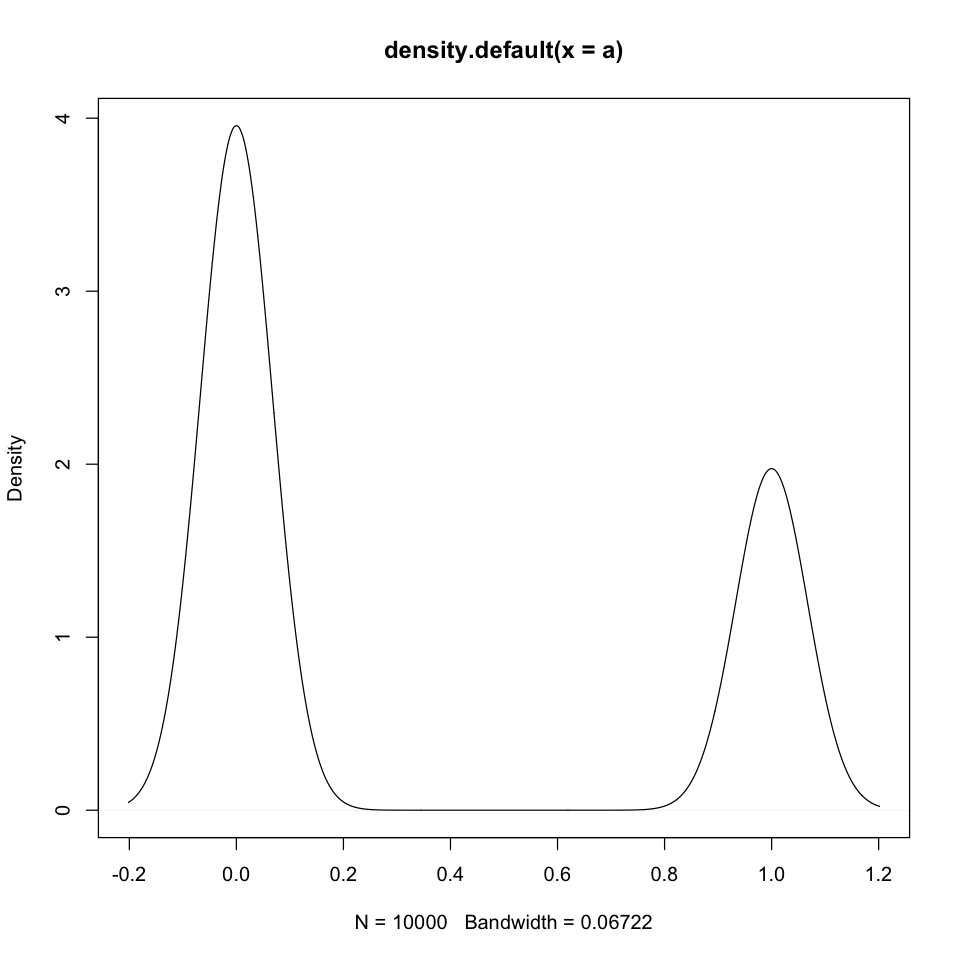

In [3]:
a<-c(rbinom(10000,1,1/3))
plot(density(a))

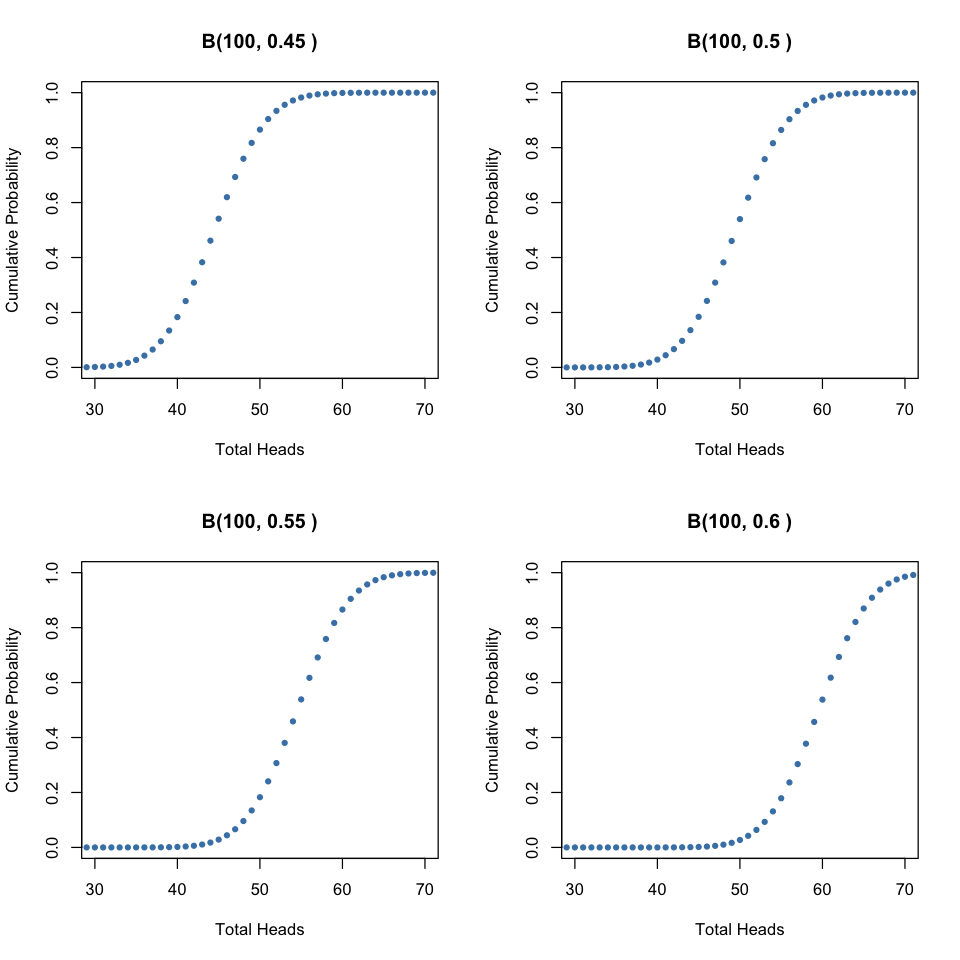

In [4]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
for (i in 1:4) {p<-0.4+i/20
    c<-paste('B(100,',p,')')  
                plot(pbinom(1:100,100,p),col='steelblue',xlab='Total Heads',ylab='Cumulative Probability',main=c,xlim=c(30,70),ylim=c(0,1),pch=20)
               }

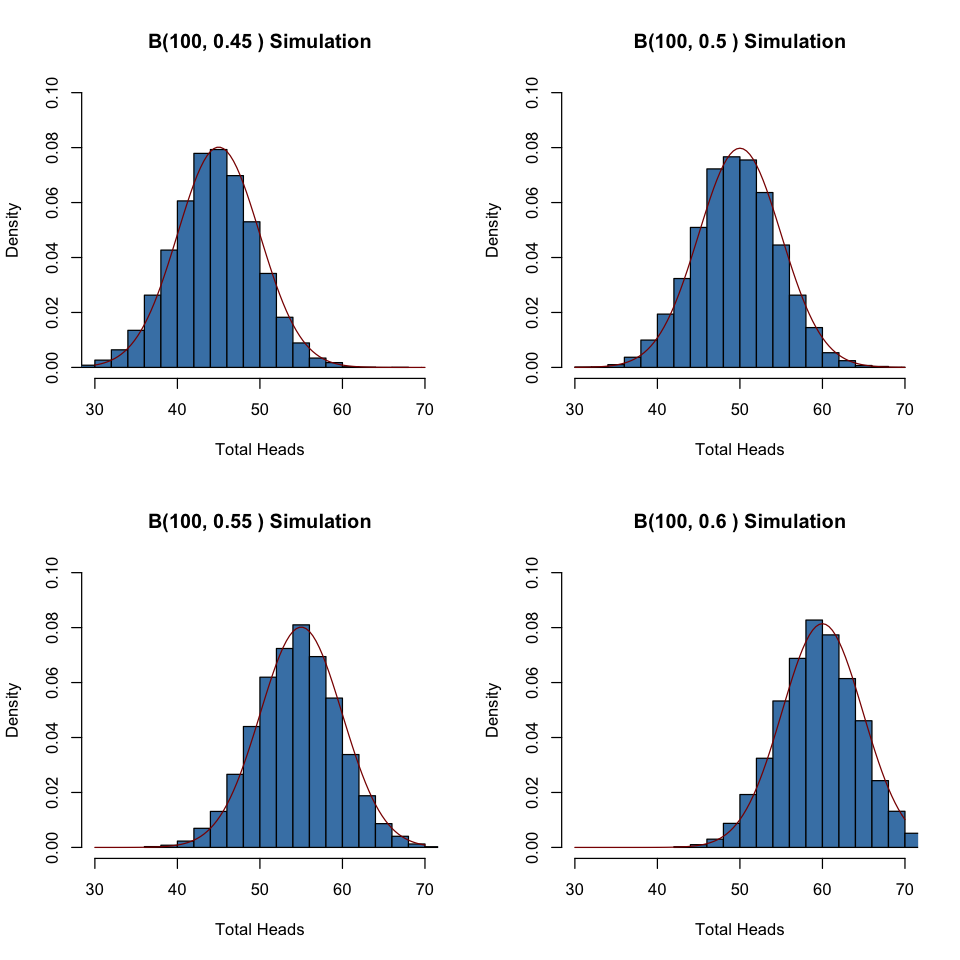

In [5]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
for (i in 1:4) {p<-0.4+i/20
    c<-paste('B(100,',p,')')  
                hist(rbinom(10000,100,p),col='steelblue',xlab='Total Heads',main=paste(c, 'Simulation'),xlim=c(30,70),ylim=c(0,0.1),freq=F)
    curve(dnorm(x,100*p,sqrt(100*p*(1-p))),add=T,col='darkred')}


$N(np,np(1-p))$

The last concept we'll introduce is the variance

Variance is given by the formula $E(X^2)-(E(X))^2$ (*not proved*), so we know $Var(X)=p-p^2=p(1-p)$. This might seem irrelevant now but once we introduce the **Central Limit Theorem** (CLT) and the **Laws of Large Numbers** (LLNs) in another notebook it will be extremely useful to know these facts.

The last key thing to say about this distribution is that, like all distributions here, it is crucial we assume our random variables are independent. If one roll of our dice affects the likelihoods of future rolls then X will no longer be distributed around the Bernoulli distirbution.